# Import

In [1]:
from jupyterbacktest import *

# Strategy

In [2]:
def long_stock_and_crypto_ratio(stock_weight, btc_weight, eth_weight):
    class Strg(Strategy):
        _name = f'SPY:BTC:ETH = {stock_weight:.2f}:{btc_weight:.2f}:{eth_weight:.2f}'
        def step(self, i, now, broker):
            if i%5==0:
                broker.trade_stock_target_weight('SPY', +stock_weight)
                broker.trade_crypto_target_weight('BTC.USD', +btc_weight)
                broker.trade_crypto_target_weight('ETH.USD', +eth_weight)
    return Strg

# Run

Altogether will run 4 strategies
[2021-01-16, 17:51:32] Total 4 backtests started	(2016-01-04 - 2021-01-15)
	[2021-01-16, 17:51:32] RUNNING	| #0 : P('SPY +1.0', rbfq=10)
	[2021-01-16, 17:51:32] RUNNING	| #1 : SPY:BTC:ETH = 0.90:0.10:0.00
	[2021-01-16, 17:51:32] RUNNING	| #2 : SPY:BTC:ETH = 0.90:0.05:0.05
	[2021-01-16, 17:51:32] RUNNING	| #3 : SPY:BTC:ETH = 0.90:0.00:0.10
[2021-01-16, 17:51:33] Total 4 backtests completed	(2016-01-04 - 2021-01-15)



,Return,CAGR,Mu,Std,Sharpe,Calmar,MDD,MDDdur,MDDloc
"P('SPY +1.0', rbfq=10)",+105.8%,+15.4%,+14.3%,18.9%,+0.757,+0.425,-33.7%,24d,2020-02-19 - 2020-03-23
SPY:BTC:ETH = 0.90:0.00:0.10,+430.5%,+39.3%,+33.1%,22.3%,+1.486,+0.946,-35.0%,26d,2020-02-14 - 2020-03-23
SPY:BTC:ETH = 0.90:0.05:0.05,+326.5%,+33.4%,+28.8%,20.3%,+1.415,+0.843,-34.2%,26d,2020-02-14 - 2020-03-23
SPY:BTC:ETH = 0.90:0.10:0.00,+238.0%,+27.3%,+24.2%,19.7%,+1.228,+0.726,-33.3%,26d,2020-02-14 - 2020-03-23


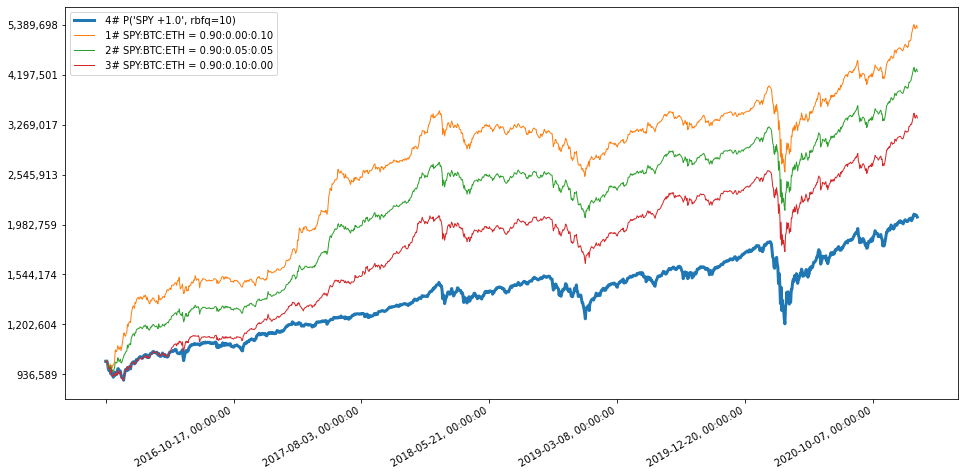

In [3]:
bt = quick_backtest([
    long('SPY +1.0')
],[
    long_stock_and_crypto_ratio(0.9, 0.10, 0.00),
    long_stock_and_crypto_ratio(0.9, 0.05, 0.05),
    long_stock_and_crypto_ratio(0.9, 0.00, 0.10),
],
    barsize='1d',
    start='2016-01-01',    
    run=dict(parallel=False),
    evaluate=dict(by='Sharpe'),
)

# Conclusion

By assigning 10% portfolio weight into cryptocurrency related assets, you can improve portfolio total return substantially. We observed improvement in both Sharpe ratio and Calmer ratio, indicating that the return per unit of risk taken is also increased. In addition, if you assign more portion of the cryptocurrency portfolio into Ether instead of Bitcoin, you can further improve the Sharpe ratio and Calmer ratio.